In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)  # display full content of columns
pd.set_option('display.max_columns', None)  # display full columns of dataframes

In [107]:
df = pd.read_csv('tiki_product_data.csv')

## Phân tích dữ liệu về 3 loại sản phẩm điện thoại, laptop và máy tính bảng hiện đang được mở bán trên sàn Tiki (tính đến 11/2024)

In [18]:
df.columns

Index(['id', 'product_name', 'price(vnd)', 'original_price', 'discount',
       'discount_rate(%)', 'review_count', 'rating_average', 'quantity_sold',
       'brand_name', 'origin', 'subcategory_name', 'category_name'],
      dtype='object')

In [19]:
df.describe().style.format('{:,.1f}')

,id,price(vnd),original_price,discount,discount_rate(%),review_count,rating_average,quantity_sold
count,950.0,950.0,950.0,950.0,950.0,950.0,950.0,950.0
mean,"243,804,445.7","12,360,803.3","13,157,827.9","797,024.6",6.1,10.5,1.2,100.1
std,"54,210,549.7","9,823,880.4","10,392,169.2","1,800,949.6",9.5,124.3,2.1,943.2
min,"4,048,043.0","212,000.0","228,622.0",0.0,0.0,0.0,0.0,0.0
25%,"222,607,988.0","3,625,000.0","3,990,000.0",0.0,0.0,0.0,0.0,0.0
50%,"273,635,433.5","10,890,000.0","11,040,000.0",0.0,0.0,0.0,0.0,0.0
75%,"275,775,829.8","18,519,250.0","19,590,000.0","637,750.0",11.8,0.0,0.0,3.0
max,"276,509,102.0","51,990,000.0","54,990,000.0","17,211,000.0",57.0,"3,082.0",5.0,"17,918.0"


### Thống kê số lượng sản phẩm đang được mở bán và tổng số lượt bán theo danh mục hàng hóa

In [86]:
df1 = df.groupby('category_name')['quantity_sold'].count().reset_index().rename(columns={'quantity_sold':'total_products'})
df2 = df.groupby('category_name')['quantity_sold'].sum().reset_index().rename(columns={'quantity_sold':'total_sales_quantity'})
df_category = pd.merge(df1, df2, on='category_name')
df_category

,category_name,total_products,total_sales_quantity
0,Laptop,477,3477.0
1,Máy tính bảng,114,5973.0
2,Điện thoại,359,85616.0


* Các sản phẩm thuộc danh mục điện thoại ghi nhật lượt bán cao vượt trội so với 2 danh mục còn lại

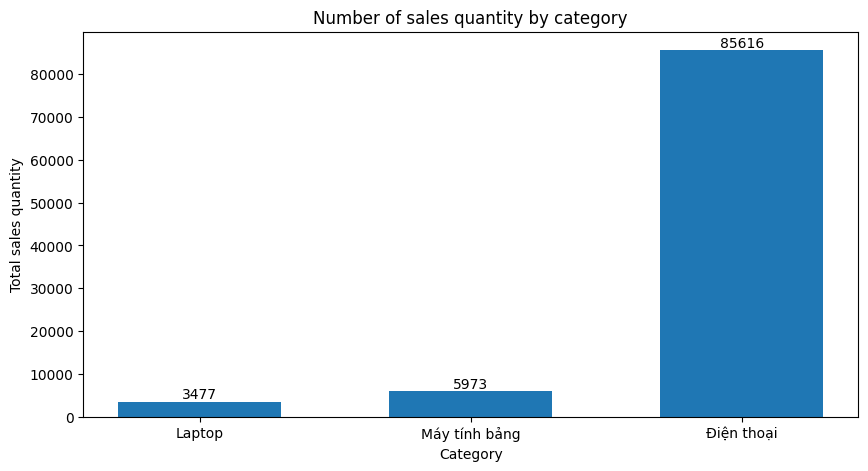

In [89]:
plt.figure(figsize = (10, 5))

# creating the bar plot
bars = plt.bar(df_category['category_name'], df_category['total_sales_quantity'], width = 0.6)
plt.xlabel("Category")
plt.ylabel("Total sales quantity")
plt.title("Number of sales quantity by category")
plt.bar_label(bars, fmt='%.0f')
plt.show()

### Thống kê số lượt bán theo brand

In [91]:
df_sales_quantity = pd.pivot_table(df, index=['brand_name'], columns='category_name', values='quantity_sold', aggfunc='sum').reset_index().fillna(0)
df_sales_quantity['total_sales_quantity'] = df_items_sold['Laptop'] + df_items_sold['Điện thoại'] + df_items_sold['Máy tính bảng']
df_sales_quantity.sort_values(by='total_sales_quantity', ascending=False)

category_name,brand_name,Laptop,Máy tính bảng,Điện thoại,total_sales_quantity
2,Apple,3199.0,437.0,27960.0,31596.0
24,POCO,0.0,0.0,29501.0,29501.0
21,OPPO,0.0,1.0,12381.0,12382.0
28,Samsung,0.0,779.0,3531.0,4310.0
12,Kindle,0.0,4228.0,0.0,4228.0
37,Xiaomi,0.0,11.0,3353.0,3364.0
20,Nokia,0.0,0.0,2760.0,2760.0
25,Panasonic,0.0,0.0,2555.0,2555.0
27,Realme,0.0,0.0,1866.0,1866.0
9,Itel,0.0,0.0,923.0,923.0


* Top 3 brand ghi nhận tổng số lượt bán cao nhất trên sàn Tiki gồm **Apple** của Mỹ và **POCO, OPPO** của Trung Quốc tính đến T11/2024

### Thống kê số lượt bán theo mức giá

/tmp/ipykernel_186239/566134803.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_counts = df.groupby("price_range")['quantity_sold'].sum()


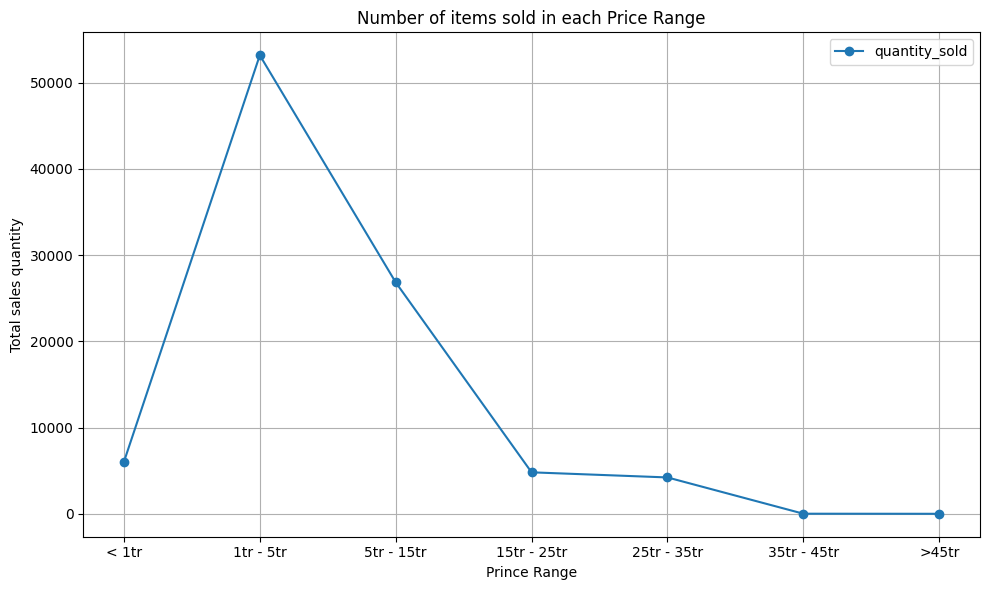

In [104]:
#Price distribution analysis.
price_bins = [0, 1000000, 5000000, 15000000, 25000000, 35000000, 45000000, float("inf")]
price_labels = ["< 1tr","1tr - 5tr","5tr - 15tr","15tr - 25tr","25tr - 35tr","35tr - 45tr",">45tr"]

#Bin the price data.
df["price_range"] = pd.cut(df["price(vnd)"], bins=price_bins,labels=price_labels, right=False)
#Count total quantity sold in each bin.
price_range_counts = df.groupby("price_range")['quantity_sold'].sum()
# #Count the number of products that record revenue in each bin
# products_record_revenue_counts = df.loc[df['quantity_sold'] > 0.0]["price_range"].value_counts().sort_index()


#plot the graph
plt.figure(figsize=(10,6))
price_range_counts.plot(kind="line",marker="o")
plt.ylabel("Total sales quantity")
plt.xlabel("Prince Range")
plt.title("Number of items sold in each Price Range")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [100]:
price_range_counts

price_range
< 1tr           6023.0
1tr - 5tr      53169.0
5tr - 15tr     26839.0
15tr - 25tr     4809.0
25tr - 35tr     4216.0
35tr - 45tr       10.0
>45tr              0.0
Name: quantity_sold, dtype: float64

* Các sản phẩm ghi nhận lượt bán nhiều nhất nằm trong khoảng giá từ 1 triệu đến 15 triệu đồng.

### Top 5 sản phẩm bán chạy nhất tính đến tháng 11/2024

In [16]:
df.sort_values(by='quantity_sold', ascending=False).head(5)

,id,product_name,price(vnd),original_price,discount,discount_rate(%),review_count,rating_average,quantity_sold,brand_name,origin,subcategory_name,category_name,price_range
503,274037360,Điện Thoại POCO C65 (6GB/128GB) - Hàng Chính Hãng,2690000,3090000,400000,13,49,4.8,17918.0,POCO,Trung Quốc,dien-thoai-smartphone,Điện thoại,1tr - 5tr
114,184036446,Apple iPhone 11,9890000,15999000,6109000,38,3082,4.8,14464.0,Apple,Trung Quốc,dien-thoai-smartphone,Điện thoại,5tr - 15tr
504,274037365,Điện Thoại POCO C65 (8GB/256GB) - Hàng Chính Hãng,2990000,3590000,600000,17,77,4.8,11527.0,POCO,Trung Quốc,dien-thoai-smartphone,Điện thoại,1tr - 5tr
379,270975124,Điện Thoại Oppo A58 6GB/128GB - Hàng Chính Hãng,4090000,4990000,900000,18,76,5.0,9085.0,OPPO,Trung Quốc,dien-thoai-smartphone,Điện thoại,1tr - 5tr
115,184059211,Apple iPhone 13,13490000,24990000,11500000,46,2009,5.0,7756.0,Apple,Trung Quốc,dien-thoai-smartphone,Điện thoại,5tr - 15tr


* Top 5 sản phẩm bán chạy nhất đều là các sản phẩm điện thoại smartphone với mức giá dưới 15 triệu

### Top 5 sản phẩm có discount rate lớn nhất

In [11]:
df.sort_values(by='discount_rate(%)', ascending=False).head(5)

,id,product_name,price(vnd),original_price,discount,discount_rate(%),review_count,rating_average,quantity_sold,brand_name,origin,subcategory_name,category_name
882,276285659,Máy tính bảng Masstel Tab 10A ( 3GB - 32GB) - Hàng Chính Hãng,1290000,2990000,1700000,57,3,4.0,9.0,Masstel,Trung Quốc,may-tinh-bang,Máy tính bảng
57,140184098,Điện Thoại Vsmart Bee Lite 2GB/16GB - Hàng Chính Hãng,999000,1990000,991000,50,31,4.5,123.0,Vsmart,NaN,dien-thoai-smartphone,Điện thoại
115,184059211,Apple iPhone 13,13490000,24990000,11500000,46,2009,5.0,7756.0,Apple,Trung Quốc,dien-thoai-smartphone,Điện thoại
187,206218031,Máy tính bảng viết tay Xiaomi Wicue màn hình LCD màu cầu vồng không đèn nền 12inch,425000,768000,343000,45,0,0.0,0.0,NaN,NaN,may-tinh-bang,Máy tính bảng
881,276285657,Máy tính bảng Masstel Tab 8.3 ( 3GB - 32GB) - Hàng Chính Hãng,950000,1590000,640000,40,2,3.0,4.0,Masstel,Trung Quốc,may-tinh-bang,Máy tính bảng


* Iphone 13 có discount rate nằm trong top 5 và cũng nằm trong top 5 các sản phẩm bán chạy nhất tính đến tháng 11/2024

### Thống kê sản phẩm ghi nhận lượt bán cao nhất theo từng mức giá

In [14]:
result_df = df.loc[df.groupby('price_range')['quantity_sold'].idxmax()]

/tmp/ipykernel_186239/2078198505.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df = df.loc[df.groupby('price_range')['quantity_sold'].idxmax()]


,id,product_name,price(vnd),original_price,discount,discount_rate(%),review_count,rating_average,quantity_sold,brand_name,origin,subcategory_name,category_name,price_range
366,270471106,Điện Thoại Nokia 105 4G Pro TA-1538 - Hàng Chính Hãng,640000,680000,40000,6,65,4.7,1409.0,Nokia,Trung Quốc,dien-thoai-pho-thong,Điện thoại,< 1tr
503,274037360,Điện Thoại POCO C65 (6GB/128GB) - Hàng Chính Hãng,2690000,3090000,400000,13,49,4.8,17918.0,POCO,Trung Quốc,dien-thoai-smartphone,Điện thoại,1tr - 5tr
114,184036446,Apple iPhone 11,9890000,15999000,6109000,38,3082,4.8,14464.0,Apple,Trung Quốc,dien-thoai-smartphone,Điện thoại,5tr - 15tr
44,124742926,Apple MacBook Air 2020 13-inch (Apple M1 - 8GB/ 256GB) - MGN63SA/A - Space Grey,18290000,24990000,6700000,27,864,5.0,2945.0,Apple,Trung Quốc,macbook-imac,Laptop,15tr - 25tr
404,271973414,iPhone 15 Pro Max,28490000,33490000,5000000,15,252,5.0,3488.0,Apple,Trung Quốc,dien-thoai-smartphone,Điện thoại,25tr - 35tr
639,275572013,Điện thoại Samsung Galaxy Z Fold6 (12GB/ 256GB) - Hàng Chính Hãng,38490000,43990000,5500000,13,2,5.0,8.0,Samsung,Việt Nam,dien-thoai-smartphone,Điện thoại,35tr - 45tr
214,214863354,Laptop LG Gram 2022 17Z90Q-G.AH74A5 (i7-1260P | 16GB | 512GB | Intel Iris Xe Graphics | 17' WQXGA 99% DCI-P3 | Win 11) Hàng chính hãng,47990000,47990000,0,0,0,0.0,0.0,NaN,NaN,laptop-truyen-thong,Laptop,>45tr


In [106]:
result_df[['product_name', 'quantity_sold', 'price_range']].rename(columns={'quantity_sold':"total_sales_quantity"})

,product_name,total_sales_quantity,price_range
366,Điện Thoại Nokia 105 4G Pro TA-1538 - Hàng Chính Hãng,1409.0,< 1tr
503,Điện Thoại POCO C65 (6GB/128GB) - Hàng Chính Hãng,17918.0,1tr - 5tr
114,Apple iPhone 11,14464.0,5tr - 15tr
44,Apple MacBook Air 2020 13-inch (Apple M1 - 8GB/ 256GB) - MGN63SA/A - Space Grey,2945.0,15tr - 25tr
404,iPhone 15 Pro Max,3488.0,25tr - 35tr
639,Điện thoại Samsung Galaxy Z Fold6 (12GB/ 256GB) - Hàng Chính Hãng,8.0,35tr - 45tr
214,Laptop LG Gram 2022 17Z90Q-G.AH74A5 (i7-1260P | 16GB | 512GB | Intel Iris Xe Graphics | 17' WQXGA 99% DCI-P3 | Win 11) Hàng chính hãng,0.0,>45tr
